In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Ucitali nas dataset direktno preko kerasa Ovaj dataset se zove CIFAR image dataset. I automatski smo ga raspodelili u svoje skupove
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Opet smo radi lakse obrade podataka nase skupove koju u ovo slucaju su 32x32 u boji. Podelili smo ih sa 255.0 da bi njihove vrednosti bile [0,1]
train_images, test_images = train_images / 255.0 , test_images / 255.0
#Klase koji nas dataset poseduje
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
train_labels[1][0] # Vidi zasto je ovo ovde

9

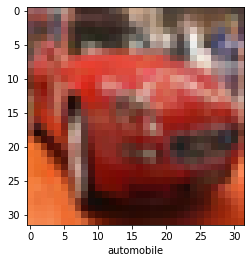

In [5]:
#Prikaz slike n pozicije i njen Label vrednost
img_num = 5

plt.imshow(train_images[img_num], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_num][0]])
plt.show()

In [6]:
model = models.Sequential() #Sekvencijalno prolazimo kroz neuralne mrezu NAS CONVULACIONI DEO
# Prvi konvulacioni sloj sa 32 (filtera) koji su 3 x 3 velicine, AF 'relu', i input velicina 32 x 32 i 3 colour chanels RGB
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2))) # Uradi MAX funkciju u obliku 2x2 bez paddinga i skrati array
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [7]:
model.summary() # Ispisi slojene naseg modela i prikaz njegovog potencijalnog outputa

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
#Treniranje modela
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5678 - accuracy: 0.4259 - val_loss: 1.2994 - val_accuracy: 0.5305
Epoch 2/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.1840 - accuracy: 0.5809 - val_loss: 1.0923 - val_accuracy: 0.6148
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0308 - accuracy: 0.6374 - val_loss: 1.0100 - val_accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9278 - accuracy: 0.6728 - val_loss: 0.9403 - val_accuracy: 0.6713
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8613 - accuracy: 0.6971 - val_loss: 0.9491 - val_accuracy: 0.6720
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7991 - accuracy: 0.7191 - val_loss: 0.9556 - val_accuracy: 0.6698
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7494 - accuracy: 0.7350 - val_loss: 0.9048 -

In [11]:
#Evaluacija modela
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

# U predhodnom slucaju nas evalution accuracy je bio 71 % sto nije lose za ovako nas jednostavan model

313/313 - 1s - loss: 0.8921 - accuracy: 0.7127 - 1s/epoch - 4ms/step
0.7127000093460083


Predicted class: ship
Laben: ship


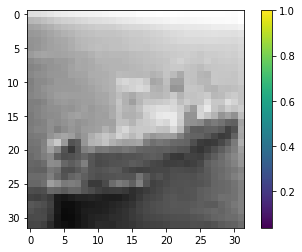

In [17]:
pic_num = 234

prediction = model.predict(test_images)
print("Predicted class: " + class_names[np.argmax(prediction[pic_num])])
print("Laben: " + class_names[test_labels[pic_num][0]])
plt.figure()
plt.imshow(test_images[pic_num])
plt.colorbar()
plt.grid(False)
plt.show()

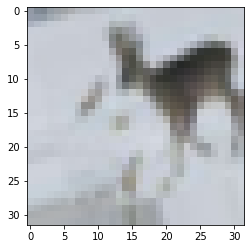

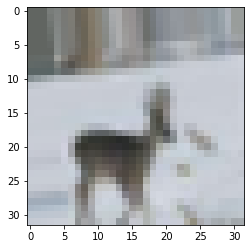

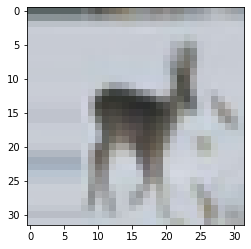

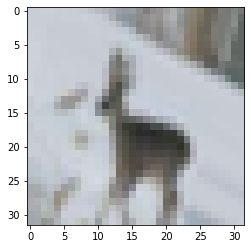

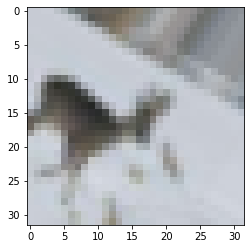

In [23]:
#Kao sto smo rekli malopre da bismo imali model sa visokom verovatnocom evaluacije tj accuracy, moramo
#da imamo i neverovatno veliki dataset, skup podataka milioni i millioni, ili da koristimo neke tehnologije

# SMALL DATASETS - DATA AUGMENTATION

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#Pravimo generator koji ce transformisati,augmentovati nase slike
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

#Izaberi sliku koju ces transformisati
test_img = train_images[20]
img = image.img_to_array(test_img) #Konvertuje iz tensorflow dataset formate u numpy format
img = img.reshape((1, ) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix="test", save_format="jpeg"): #Ova funkcija radi dozivotno dok je mi kroz break ne zaustavimo
    plt.figure(i)                                                       #Cuvace slike u nas direktorijum gde smo sada
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # Prikazi samo 4 slike
        break  
plt.show()